Poonam Ligade
1st Feb 2017
This notebook is like note to self.
I am trying to understand various components of Artificial Neural Networks aka Deep Learning.
Hope it might be useful for someone else here.
I am designing neural net on MNIST handwritten digits images to identify their correct label i.e number in image.
You must have guessed its an image recognition task.
MNIST is called Hello world of Deep learning.
Lets start!!
This notebook is inspired from Jeremy's Deep Learning mooc and Deep learning with python book by Keras author François Chollet .


Import all required libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# Load Train and Test data

In [3]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = (train.ix[:,1:].values).astype('float32') # all pixel values
y_train = train.ix[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [6]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [7]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

The output variable is an integer from 0 to 9. This is a multiclass classification problem.

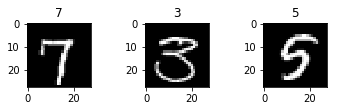

In [8]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [9]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

# Preprocessing the digit images

Feature Standardization

In [14]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px


In [18]:
std_px

78.677589

One Hot encoding of labels.

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension.

In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [19]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

Lets plot 10th label.

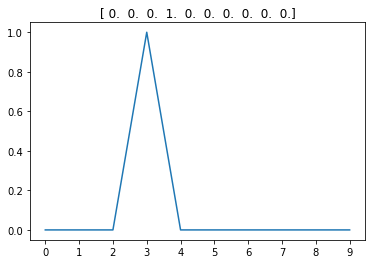

In [20]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

# Designing neural network architecture



Linear model

In [21]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Lets create a simple model from Keras Sequential layer.

Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.

In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format.
(In theano colour channel comes first)

Flatten will transform input into 1D array.

Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer.
In the last layer we have to specify output dimensions/classes of the model.
Here it's 10, since we have to output 10 different digit labels.


In [22]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


Compile network

Before making network ready for training we have to make sure to add below things:
A loss function: to measure how good the network is
An optimizer: to update network as it sees more data and reduce loss value
Metrics: to monitor performance of network
    


In [23]:
from keras.optimizers import Adam ,RMSprop
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [33]:
val_batches.n

4200

In [34]:
history=model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.n)


Epoch 1/1
37800/37800 [==============================] - 6s - loss: 0.4809 - acc: 0.8542 - val_loss: 0.3369 - val_acc: 0.9026


In [ ]:
history_dict = history.history
history_dict.keys()

model = Sequential()
model.add(Dense(64, activation='relu',input_dim=(28 * 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy',
 metrics=['accuracy'])

history=model.fit(train_images, train_labels, 
            epochs=15, batch_size=64)

From the graphs we can see that training loss is decreasing and training accuracy is increasing slowly. Thats what we intended to do using gradient descent.
But thats not the case with validation set
after 15th epoch val_loss is increasing and val_acc is decreasing.
That is called as **overfitting**.

after the second epoch, we are over optimising on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set

To avoid this we will simply stop training after 15 epochs.

In [35]:
model.optimizer.lr=0.1
history=model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.n)


Epoch 1/1
37800/37800 [==============================] - 5s - loss: 0.3078 - acc: 0.9118 - val_loss: 0.3197 - val_acc: 0.9064


In [20]:
model.optimizer.lr=0.01
history=model.fit(X_train, y_train,validation_split = 0.05, 
            nb_epoch=3, batch_size=64)

Train on 39900 samples, validate on 2100 samples
Epoch 1/3
39900/39900 [==============================] - 1s - loss: 0.2427 - acc: 0.9309 - val_loss: 0.3225 - val_acc: 0.9186
Epoch 2/3
39900/39900 [==============================] - 1s - loss: 0.2424 - acc: 0.9314 - val_loss: 0.3247 - val_acc: 0.9186
Epoch 3/3
39900/39900 [==============================] - 1s - loss: 0.2405 - acc: 0.9304 - val_loss: 0.3139 - val_acc: 0.9171


Fully Connected Model

In [46]:
def get_fully_connected_model():
    model=Sequential([Lambda(standardize,input_shape=(28,28,1)),
                     Flatten(),
                     Dense(512,activation='relu'),
                     Dense(10, activation='softmax')])
    model.compile(Adam(),metrics=['accuracy'],loss='categorical_crossentropy')
    return model

In [47]:
fc_model=get_fully_connected_model()

In [48]:
history=fc_model.fit(X_train, y_train,validation_split = 0.09, 
            nb_epoch=3, batch_size=64,verbose=2)

Train on 38220 samples, validate on 3780 samples
Epoch 1/3
2s - loss: 0.2263 - acc: 0.9305 - val_loss: 0.1385 - val_acc: 0.9569
Epoch 2/3
2s - loss: 0.0928 - acc: 0.9714 - val_loss: 0.1019 - val_acc: 0.9690
Epoch 3/3
2s - loss: 0.0603 - acc: 0.9806 - val_loss: 0.1081 - val_acc: 0.9685


In [48]:
fc_model.optimizer.lr=0.001
history=fc_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=5, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
2s - loss: 0.0074 - acc: 0.9979 - val_loss: 0.1373 - val_acc: 0.9783
Epoch 2/5
2s - loss: 0.0070 - acc: 0.9979 - val_loss: 0.1227 - val_acc: 0.9793
Epoch 3/5
2s - loss: 0.0089 - acc: 0.9975 - val_loss: 0.1413 - val_acc: 0.9774
Epoch 4/5
1s - loss: 0.0069 - acc: 0.9976 - val_loss: 0.1172 - val_acc: 0.9788
Epoch 5/5
1s - loss: 0.0128 - acc: 0.9964 - val_loss: 0.1470 - val_acc: 0.9764


Adding convolutional layers

In [49]:
def get_cnn_model():
    model=Sequential([
                        Lambda(standardize,input_shape=(28,28,1)),
                        Convolution2D(32,3,3,activation='relu'),
                        Convolution2D(32,3,3,activation='relu'),
                        MaxPooling2D(pool_size=(2,2)),
                        Convolution2D(64,3,3,activation='relu'),
                        Convolution2D(64,3,3,activation='relu'),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(512,activation='relu'),
                        Dense(10, activation='softmax')
                     ])
    model.compile(Adam(),metrics=['accuracy'],loss='categorical_crossentropy')
    return model

In [50]:
cnn_model=get_cnn_model()

In [51]:
history=cnn_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=2, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/2
5s - loss: 0.1477 - acc: 0.9548 - val_loss: 0.0529 - val_acc: 0.9848
Epoch 2/2
4s - loss: 0.0425 - acc: 0.9873 - val_loss: 0.0301 - val_acc: 0.9895


In [92]:
cnn_model.optimizer.lr=0.01
history=cnn_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=2, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/2
4s - loss: 0.0177 - acc: 0.9946 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 2/2
4s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0386 - val_acc: 0.9900


Data augmentation

In [53]:
gen=image.ImageDataGenerator(
    zca_whitening=True, rotation_range=8.0, width_shift_range=0.8, height_shift_range=0.08, shear_range=0.3,
    zoom_range=0.08)

In [54]:
batches = gen.flow(X_train, y_train, batch_size=64)

In [91]:
cnn_model.optimizer.lr=0.01
history=cnn_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=2, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/2
4s - loss: 0.0300 - acc: 0.9901 - val_loss: 0.0374 - val_acc: 0.9879
Epoch 2/2
4s - loss: 0.0227 - acc: 0.9931 - val_loss: 0.0266 - val_acc: 0.9914


Batch Normalization

In [18]:
def get_bn_model():
    model = Sequential([
                        Lambda(standardize,input_shape=(28,28,1)),
                        Convolution2D(32,3,3,activation='relu'),
                        BatchNormalization(),
                        Convolution2D(32,3,3,activation='relu'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=(2,2)),
                        Convolution2D(64,3,3,activation='relu'),
                        BatchNormalization(),
                        Convolution2D(64,3,3,activation='relu'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(512,activation='relu'),
                        BatchNormalization(),
                        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
bn_model=get_bn_model()

In [94]:
history=bn_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=2, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/2
9s - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0436 - val_acc: 0.9848
Epoch 2/2
9s - loss: 0.0292 - acc: 0.9903 - val_loss: 0.0312 - val_acc: 0.9907


In [95]:
bn_model.optimizer.lr=0.01
history=bn_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=2, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/2
9s - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0416 - val_acc: 0.9862
Epoch 2/2
9s - loss: 0.0186 - acc: 0.9939 - val_loss: 0.0231 - val_acc: 0.9924


In [20]:
bn_model.optimizer.lr=0.001
history=bn_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=15, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
9s - loss: 0.1017 - acc: 0.9682 - val_loss: 0.0525 - val_acc: 0.9821
Epoch 2/15
8s - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0595 - val_acc: 0.9831
Epoch 3/15
8s - loss: 0.0280 - acc: 0.9913 - val_loss: 0.0329 - val_acc: 0.9907
Epoch 4/15
8s - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0281 - val_acc: 0.9919
Epoch 5/15
8s - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0400 - val_acc: 0.9876
Epoch 6/15
8s - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0394 - val_acc: 0.9879
Epoch 7/15
7s - loss: 0.0141 - acc: 0.9960 - val_loss: 0.0346 - val_acc: 0.9902
Epoch 8/15
8s - loss: 0.0127 - acc: 0.9959 - val_loss: 0.0296 - val_acc: 0.9919
Epoch 9/15
8s - loss: 0.0110 - acc: 0.9966 - val_loss: 0.0279 - val_acc: 0.9914
Epoch 10/15
8s - loss: 0.0111 - acc: 0.9965 - val_loss: 0.0274 - val_acc: 0.9933
Epoch 11/15
8s - loss: 0.0120 - acc: 0.9961 - val_loss: 0.0339 - val_acc: 0.9917
Epoch 12/15
8s - loss: 0.0093 - acc: 0.9972 - val_loss: 0.0284 - val_

Adding Dropout layer to prevent overfitting of model

In [37]:
def get_bn_with_dropout_model():
    model = Sequential([
                        Lambda(standardize,input_shape=(28,28,1)),
                        Convolution2D(32,3,3,activation='relu'),
                        BatchNormalization(),
                        Convolution2D(64,3,3,activation='relu'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=(2,2)),
                        Convolution2D(128,3,3,activation='relu'),
                        BatchNormalization(),
                        Convolution2D(128,3,3,activation='relu'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(512,activation='relu'),
                        BatchNormalization(),
                        Dropout(0.5),
                        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
bn_with_dropout_model = get_bn_with_dropout_model()

bn_with_dropout_model.optimizer.lr=0.001
history=bn_with_dropout_model.fit(X_train, y_train,validation_split = 0.10, 
            nb_epoch=15, batch_size=64,verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
12s - loss: 0.1259 - acc: 0.9618 - val_loss: 0.0920 - val_acc: 0.9719
Epoch 2/15
10s - loss: 0.0474 - acc: 0.9850 - val_loss: 0.0503 - val_acc: 0.9864
Epoch 3/15
10s - loss: 0.0393 - acc: 0.9880 - val_loss: 0.0224 - val_acc: 0.9929
Epoch 4/15
10s - loss: 0.0312 - acc: 0.9903 - val_loss: 0.0248 - val_acc: 0.9921
Epoch 5/15
10s - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0311 - val_acc: 0.9886
Epoch 6/15
10s - loss: 0.0245 - acc: 0.9917 - val_loss: 0.0241 - val_acc: 0.9929
Epoch 7/15
10s - loss: 0.0227 - acc: 0.9928 - val_loss: 0.0238 - val_acc: 0.9933
Epoch 8/15
10s - loss: 0.0209 - acc: 0.9928 - val_loss: 0.0288 - val_acc: 0.9924
Epoch 9/15
10s - loss: 0.0173 - acc: 0.9943 - val_loss: 0.0344 - val_acc: 0.9905
Epoch 10/15
10s - loss: 0.0176 - acc: 0.9940 - val_loss: 0.0365 - val_acc: 0.9893
Epoch 11/15
10s - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0331 - val_acc: 0.9898
Epoch 12/15
10s - loss: 0.0117 - acc: 0.9965 - val_loss: 0

In [28]:
bn_with_dropout_model = get_bn_with_dropout_model()

bn_with_dropout_model.optimizer.lr=0.001
history=bn_with_dropout_model.fit(X_train, y_train, 
            nb_epoch=15, batch_size=64,verbose=2)

Epoch 1/15
10s - loss: 0.1358 - acc: 0.9584
Epoch 2/15
9s - loss: 0.0510 - acc: 0.9844
Epoch 3/15
9s - loss: 0.0401 - acc: 0.9873
Epoch 4/15
9s - loss: 0.0317 - acc: 0.9892
Epoch 5/15
10s - loss: 0.0298 - acc: 0.9900
Epoch 6/15
9s - loss: 0.0254 - acc: 0.9916
Epoch 7/15
10s - loss: 0.0241 - acc: 0.9925
Epoch 8/15
10s - loss: 0.0227 - acc: 0.9930
Epoch 9/15
10s - loss: 0.0192 - acc: 0.9939
Epoch 10/15
10s - loss: 0.0166 - acc: 0.9950
Epoch 11/15
10s - loss: 0.0170 - acc: 0.9948
Epoch 12/15
10s - loss: 0.0151 - acc: 0.9952
Epoch 13/15
10s - loss: 0.0123 - acc: 0.9959
Epoch 14/15
9s - loss: 0.0104 - acc: 0.9965
Epoch 15/15
9s - loss: 0.0121 - acc: 0.9956


In [31]:
predictions = bn_with_dropout_model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)
predictions

array([2, 0, 9, ..., 3, 9, 2])

Ensemble

In [44]:
def ensemble():
    bn_with_dropout_model = get_bn_with_dropout_model()

    bn_with_dropout_model.optimizer.lr=0.1
    history=bn_with_dropout_model.fit(X_train, y_train,
            nb_epoch=2, batch_size=64,verbose=2)
    
    bn_with_dropout_model.optimizer.lr=0.01
    history=bn_with_dropout_model.fit(X_train, y_train, 
            nb_epoch=4, batch_size=64,verbose=2)
    
    bn_with_dropout_model.optimizer.lr=0.001
    history=bn_with_dropout_model.fit(X_train, y_train, 
            nb_epoch=8, batch_size=64,verbose=2)
    
    bn_with_dropout_model.optimizer.lr=0.0001
    history=bn_with_dropout_model.fit(X_train, y_train, 
            nb_epoch=15, batch_size=64,verbose=2)
    
    return model


In [45]:
ensemble_model=[ensemble() for i in range(6)]

Epoch 1/2
13s - loss: 2.6668 - acc: 0.8164
Epoch 2/2
11s - loss: 3.4081 - acc: 0.7865
Epoch 1/4
11s - loss: 3.6669 - acc: 0.7714
Epoch 2/4
11s - loss: 2.7606 - acc: 0.8279
Epoch 3/4
11s - loss: 2.8856 - acc: 0.8205
Epoch 4/4
11s - loss: 2.5801 - acc: 0.8396
Epoch 1/8
10s - loss: 2.9881 - acc: 0.8143
Epoch 2/8
11s - loss: 2.3233 - acc: 0.8557
Epoch 3/8
11s - loss: 3.6671 - acc: 0.7721
Epoch 4/8
11s - loss: 3.5769 - acc: 0.7777
Epoch 5/8
11s - loss: 3.5357 - acc: 0.7804
Epoch 6/8
10s - loss: 3.2879 - acc: 0.7959
Epoch 7/8
11s - loss: 3.0311 - acc: 0.8117
Epoch 8/8
11s - loss: 3.0747 - acc: 0.8091
Epoch 1/15
11s - loss: 2.4926 - acc: 0.8453
Epoch 2/15
11s - loss: 2.3098 - acc: 0.8565
Epoch 3/15
11s - loss: 2.8299 - acc: 0.8243
Epoch 4/15
11s - loss: 3.3804 - acc: 0.7900
Epoch 5/15
11s - loss: 3.0954 - acc: 0.8078
Epoch 6/15
12s - loss: 2.2307 - acc: 0.8615
Epoch 7/15
12s - loss: 2.5426 - acc: 0.8422
Epoch 8/15
11s - loss: 2.2381 - acc: 0.8610
Epoch 9/15
11s - loss: 2.8919 - acc: 0.8205
Ep

In [46]:
path = "/home/vishnu/Documents/mnist"
model_path = path + 'models/'

In [ ]:
for i,m in enumerate(models):
    m.save_weights(model_path+'cnn-mnist23-'+str(i)+'.pkl')


In [ ]:
#evals = np.array([m.evaluate(X_test, y_test, batch_size=256) for m in models])

all_preds = np.stack([m.predict(X_test, batch_size=256) for m in models])
all_preds.shape
